# Classifying time series


Authors: Thomas Moreau

## Variable stars

Most stars emit light steadily in time, but a small fraction of them has a variable light curve: light emission versus time. We call them variable stars. The light curves are usually periodic and highly regular. There are essentially two reasons why light emission can vary. First, the star itself can be oscillating, so its light emission varies in time. Second, the star that seems a single point at Earth (because of our large distance) is actually a binary system: two stars that orbit around their common center of gravity. When the orbital plane is parallel to our line of view, the stars eclipse each other periodically, creating a light curve with a charateristic signature. Identifying, classifying, and analyzing variable stars are hugely important for calibrating distances, and making these analyses automatic will be crucial in the upcoming sky survey projects such as LSST.

In this notebook, we consider an extract of 2912 stars from the [EROS-1 catalog](http://eros.in2p3.fr/) with 4 types of variable light curves:
- [Eclipsing binary](http://en.wikipedia.org/wiki/Binary_star#Eclipsing_binaries),
- [Cepheid](http://en.wikipedia.org/wiki/Cepheid_variable),
- [RR-Lyrae](http://en.wikipedia.org/wiki/RR_Lyrae_variable),
- [Mira](http://en.wikipedia.org/wiki/Mira_variable).

Our goal is to learn a function that assign an observed variable star to one of these 4 classes. The observations are composed of the light curves in two frequency bands (red and blue), as well as static variables. 

Let us for load the data:

In [1]:
import os
import pandas as pd


X_df = pd.read_parquet("data/variable_stars.parquet")
y = X_df['type']
X_df = X_df.drop(columns='type')

In [2]:
X_df.head()

,patch_id,star_id_b,star_id_r,magnitude_b,magnitude_r,asc_d,asc_m,asc_s,dec_d,dec_m,...,time_points_b,time_points_r,light_points_b,light_points_r,error_points_b,error_points_r,bkg_points_b,bkg_points_r,polltn_points_b,polltn_points_r
0,135.0,9613.0,10062.0,19.1458,18.8044,5.0,40.0,51.37,-70.0,13.0,...,"[290.3, 291.35, 322.25, 326.24, 345.18, 347.23...","[290.34, 291.31, 322.29, 326.28, 345.23, 347.1...","[19.15, 18.96, 18.86, 19.17, 18.96, 19.03, 19....","[18.75, 18.66, 18.5, 18.68, 18.77, 18.69, 18.7...","[0.13, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.1...","[0.16, 0.25, 0.14, 0.17, 0.18, 0.23, 0.14, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.13, 0.13, 0.11, 0.11, 0.14, 0.19, 0.08, 0.1..."
1,271.0,4304.0,4708.0,17.6799,15.3077,5.0,28.0,51.55,-69.0,23.0,...,"[290.3, 291.35, 322.25, 326.24, 345.18, 347.23...","[290.34, 291.31, 322.29, 326.28, 345.23, 347.1...","[17.7, 17.97, 17.83, 17.71, 17.6, 17.4, 17.46,...","[15.43, 15.66, 15.66, 15.5, 15.28, 15.28, 15.3...","[0.12, 0.1, 0.08, 0.09, 0.11, 0.09, 0.11, 0.12...","[0.1, 0.11, 0.09, 0.09, 0.06, 0.07, 0.06, 0.07...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.02, 0.02, 0.0, 0.0, 0.02, 0.02, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,295.0,8200.0,8739.0,19.3872,18.8606,5.0,27.0,7.89,-68.0,43.0,...,"[290.3, 291.35, 322.25, 326.24, 345.18, 347.23...","[290.34, 291.31, 322.29, 326.28, 345.23, 347.1...","[20.16, 19.37, 19.28, 19.53, 19.53, 19.95, 19....","[19.19, 18.81, 18.86, 19.06, 19.05, 18.89, 18....","[0.25, 0.14, 0.13, 0.16, 0.22, 0.26, 0.19, 0.2...","[0.27, 0.25, 0.17, 0.21, 0.24, 0.25, 0.15, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0,...","[0.01, 0.01, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0....","[0.03, 0.03, 0.02, 0.02, 0.06, 0.11, 0.05, 0.0...","[0.06, 0.03, 0.03, 0.03, 0.05, 0.06, 0.02, 0.0..."
3,223.0,530.0,557.0,16.4751,15.5033,5.0,35.0,41.69,-70.0,56.0,...,"[290.3, 291.35, 322.25, 326.24, 345.18, 347.23...","[290.34, 291.31, 322.29, 326.28, 345.23, 347.1...","[16.73, 16.3, 16.25, 16.38, 16.22, 16.07, 16.0...","[15.24, 15.55, 15.74, 15.69, 15.55, 15.37, 15....","[0.14, 0.12, 0.11, 0.18, 0.23, 0.16, 0.2, 0.16...","[0.25, 0.21, 0.13, 0.13, 0.12, 0.13, 0.12, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,354.0,10866.0,12022.0,17.8301,16.7286,5.0,21.0,50.48,-69.0,17.0,...,"[290.3, 291.35, 322.25, 326.24, 345.18, 347.23...","[290.34, 291.31, 322.29, 326.28, 345.23, 347.1...","[17.67, 17.51, 17.78, 17.73, 17.6, 17.87, 18.0...","[16.97, 16.88, 16.72, 16.67, 16.47, 17.12, 16....","[0.13, 0.1, 0.1, 0.1, 0.12, 0.1, 0.12, 0.14, 0...","[0.13, 0.14, 0.1, 0.1, 0.08, 0.18, 0.08, 0.08,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.02, 0.0, 0....","[0.19, 0.22, 0.13, 0.11, 0.11, 0.35, 0.05, 0.0..."


There are a few informative static variables in this dataframe:

<ul>
    <li> <code><b><span style="color:black">period</span></b></code>: the estimated period of the light curve. For the correct period, it should be divided by <code>div_period</code>
    <li> <code><b><span style="color:black ">div_period</span></b></code>: The algorithm that estimates the <code>period</code> sometimes finds a multiple of the period. These cases were human-detected, and the divisor was recorded. In principle this variable is not available automatically as an observable, but we are confident that it could be obtained automatically, so we allow it as an input.
    <li> <code><b>magnitude_b, magnitude_r</b></code>: The average apparent luminosity of the star (in two frequency bands). <a href="http://www.astro-tom.com/technical_data/magnitude_scale.htm">Magnitude</a> is a logarithmic measure, and the higher it is, the lower the apparent luminosity is.
    <li> <code><b><span style="color:black">log_p_not_variable</span></b></code>: Logarithm of the estimated probability that the star is stable.
    <li> <code><b><span style="color:black">sigma_flux_b, sigma_flux_r</span></b></code>: The square root of the total variance of the light measurements (indicating the amplitude of the variability).
    <li> <code><b><span style="color:red">type</span></b></code>: The label to predict.
</ul> 

Let us first start with a simple model based on these static features.
We start by splitting the data between train and test:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y)

Now we will start with a dummy method, to see how hard this problem is:

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

clf = DummyClassifier(
    strategy="most_frequent"
).fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))
print("Balanced accuracy:", balanced_accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.6112637362637363
Balanced accuracy: 0.25


<div class="alert alert-success">
    <b>EXERCISE</b>:
    Using what you learn yesterday, can you create a pipeline with the following steps
     <ul>
         <li>A column transformer that selects columns `'magnitude_b', 'magnitude_r', 'sigma_flux_b', 'sigma_flux_r', 'log_p_not_variable'`,</li>
         <li>A `RandomForestClassifier`</li>
    </ul>
    
 <i>Hint:</i> To select the columns without modifying them, you can use `'passthrough'` as a `Transformer` in the `ColumnTransformer`.
</div>

Solution: `solutions/02-1_static-pipeline.py`


Accuracy: 0.8021978021978022
Balanced accuracy: 0.6937104109494469


### Constructing a classifier based on the light curves

We will now turn toward building a classifier based on the raw light curves, that are stored in `time_points_r/b` and `light_points_r/b` columns of our dataset.

A first step when working with signals is usually to display them and take a look at their properties.

Number of time points for star 10: 121
Number of time points for star 11: 111
Number of time points for star 12: 123


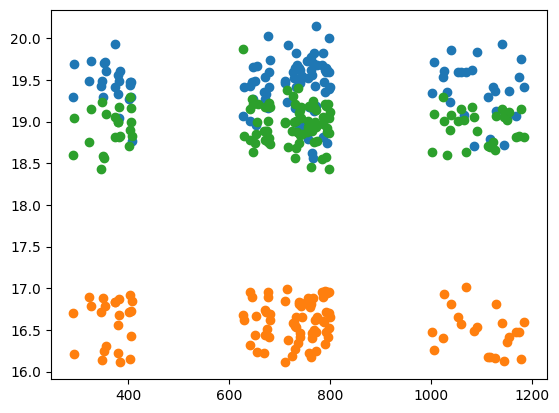

In [16]:
import matplotlib.pyplot as plt

for idx in [10, 11, 12]:
    star = X_df.iloc[idx]
    print(f"Number of time points for star {idx}: {len(star['time_points_b'])}")

    plt.scatter(star['time_points_b'], star['light_points_b'])

<div class="alert alert-info">
    <b>QUESTION</b>:
     <ul>
         <li>What can you say about these time-series?
             <i>Are they regular? Comparable? Noisy?</i></li>
         <li>How would you compare them?</li>
    </ul>
</div>


### Extracting global features with `tsfresh`


`Tsfresh` is a package aimed at automatically extracting global features from time series.
It expects as input `pandas.DataFrame`, with a `id` column that indicates to which the signal each row is linked, and a `time` column that indicate the time the sample has been observed.

With this format, it is convenient to represent non-uniform time-series, with variable lenghts.
Let us create these `DataFrame` for the train and test:


In [17]:
df_ts_train_b = pd.DataFrame([
    {'id': idx, 'time': t, 'light_b': v}
    for idx, row in X_train.iterrows()
    for t, v in zip(row['time_points_b'], row['light_points_b'])
])
df_ts_train_r = pd.DataFrame([
    {'id': idx, 'time': t, 'light_b': v}
    for idx, row in X_train.iterrows()
    for t, v in zip(row['time_points_r'], row['light_points_r'])
])

df_ts_test_b = pd.DataFrame([
    {'id': idx, 'time': t, 'light_b': v}
    for idx, row in X_test.iterrows()
    for t, v in zip(row['time_points_b'], row['light_points_b'])
])
df_ts_test_r = pd.DataFrame([
    {'id': idx, 'time': t, 'light_r': v}
    for idx, row in X_test.iterrows()
    for t, v in zip(row['time_points_r'], row['light_points_r'])
])


`Tsfresh` provides a convenient helper to extract many possible features at once.

In [18]:
from tsfresh import extract_relevant_features
extracted_features = extract_relevant_features(df_ts_train_b, y_train, column_id="id", column_sort="time")
extracted_features

Feature Extraction: 100%|███████████████████████| 30/30 [00:36<00:00,  1.20s/it]


,light_b__quantile__q_0.9,light_b__quantile__q_0.8,light_b__quantile__q_0.7,"light_b__cwt_coefficients__coeff_8__w_5__widths_(2, 5, 10, 20)","light_b__cwt_coefficients__coeff_7__w_5__widths_(2, 5, 10, 20)","light_b__cwt_coefficients__coeff_9__w_5__widths_(2, 5, 10, 20)",light_b__quantile__q_0.6,"light_b__cwt_coefficients__coeff_6__w_5__widths_(2, 5, 10, 20)","light_b__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)",light_b__mean_n_absolute_max__number_of_maxima_7,...,"light_b__fft_coefficient__attr_""angle""__coeff_10","light_b__fft_coefficient__attr_""abs""__coeff_47",light_b__number_cwt_peaks__n_1,"light_b__fft_coefficient__attr_""real""__coeff_49","light_b__fft_coefficient__attr_""abs""__coeff_57",light_b__index_mass_quantile__q_0.1,"light_b__fft_coefficient__attr_""abs""__coeff_61",light_b__energy_ratio_by_chunks__num_segments_10__segment_focus_5,light_b__time_reversal_asymmetry_statistic__lag_1,"light_b__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""var"""
0,19.420,19.326,19.264,16.574497,19.448714,13.407370,19.230,21.530791,6.204408,19.550000,...,61.885933,1.697072,17.0,2.196147,1.062390,0.105691,1.255442,0.097667,5.276428,-0.000133
1,18.058,17.910,17.834,14.988913,17.874844,11.854792,17.742,20.026351,5.799443,18.250000,...,13.417234,0.942589,14.0,-1.430316,1.925734,0.105691,1.102519,0.096727,-0.420568,-0.000197
3,17.298,16.600,16.520,13.493912,15.858205,10.982432,16.478,17.644138,5.116057,17.564286,...,-81.580152,0.789707,15.0,1.421602,1.736922,0.104839,0.797749,0.095186,-1.678940,-0.001804
5,15.410,15.374,15.320,12.994728,15.448060,10.310629,15.260,17.251097,4.887134,15.502857,...,-84.976999,0.576125,10.0,-0.066090,0.636520,0.100840,2.120000,0.100954,-1.346867,0.000844
6,19.600,19.550,19.490,16.855562,19.863450,13.536991,19.418,22.036522,6.823402,19.810000,...,114.792644,1.731819,25.0,-3.796450,5.150779,0.104839,0.769137,0.097211,6.063247,-0.000270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,18.234,18.174,18.122,15.683010,18.477002,12.613525,18.048,20.511258,5.789131,18.312857,...,-60.437441,2.380286,19.0,1.773893,5.157583,0.104839,2.627374,0.095841,-0.531258,0.000623
2907,18.673,18.450,18.329,15.441684,18.350697,12.221782,18.260,20.459614,5.907088,19.005714,...,14.395437,1.064094,15.0,-1.071924,2.232309,0.101695,2.120000,0.098822,2.957004,-0.000601
2908,17.109,17.010,16.960,14.575232,17.224138,11.662483,16.946,19.157471,5.368003,17.217143,...,-110.734987,0.641993,14.0,0.541594,0.456067,0.106557,0.870000,0.098492,-0.623197,-0.000157
2910,18.260,18.188,18.140,15.567266,18.460126,12.395771,18.090,20.585275,5.927965,18.382857,...,-115.690020,1.273358,8.0,0.960647,1.394871,0.106557,2.980000,0.098234,-1.148649,-0.000112


They provide a convenient `scikit-learn` like API, that allow working with pipelines:

In [19]:
from tsfresh.transformers import RelevantFeatureAugmenter

from sklearn import set_config
set_config(transform_output = "pandas")


clf = make_pipeline(
    make_column_transformer(('passthrough', ['magnitude_b', 'magnitude_r', 'sigma_flux_b', 'sigma_flux_r', 'log_p_not_variable'])),
    RelevantFeatureAugmenter(
        timeseries_container=df_ts_train_b, column_id='id'
    ),
    RandomForestClassifier()
).fit(X_train, y_train)

Feature Extraction: 100%|███████████████████████| 30/30 [01:13<00:00,  2.44s/it]
/home/tom/.local/miniconda/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['time__fft_coefficient__attr_"real"__coeff_63'
 'time__fft_coefficient__attr_"real"__coeff_64'
 'time__fft_coefficient__attr_"real"__coeff_65'
 'time__fft_coefficient__attr_"real"__coeff_66'
 'time__fft_coefficient__attr_"real"__coeff_67'
 'time__fft_coefficient__attr_"real"__coeff_68'
 'time__fft_coefficient__attr_"real"__coeff_69'
 'time__fft_coefficient__attr_"real"__coeff_70'
 'time__fft_coefficient__attr_"real"__coeff_71'
 'time__fft_coefficient__attr_"real"__coeff_72'
 'time__fft_coefficient__attr_"real"__coeff_73'
 'time__fft_coefficient__attr_"real"__coeff_74'
 'time__fft_coefficient__attr_"real"__coeff_75'
 'time__fft_coefficient__attr_"real"__coeff_76'
 'time__fft_coefficient__attr_"real"__coeff_77'
 'time__fft_coefficient__attr_"real"__coeff_78'
 'time__fft_coefficie

In [ ]:
clf.named_steps

In [ ]:
clf.set_params(**{
    "relevantfeatureaugmenter__timeseries_container": df_ts_test_b,
})
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))

### Aligning and resampling the signals

The benefit of working with global features is that they can often be computed even with unaligned time-series.
However, these features can fail to catpure some interesting notion of similarity between the samples.

We will now explore how to align and resample the data.

Here, we have data that is periodic, and we are informed about the period by the column `period`.

In [ ]:
X_df['period'] = X_df['period'] / X_df['div_period']

We can thus look at the data on one period:

In [ ]:
import matplotlib.pyplot as plt

for idx in [10, 11, 100]:
    star = X_df.iloc[idx]
    print(f"Number of time points for star {idx}: {len(star['time_points_b'])}")

    plt.scatter(star['time_points_b'] % star['period'], star['light_points_b'])

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>How would you modify this code to "align" the time series?</li>
         <li>How would you modify this code to cope with the fact that the sample are not aligned?</li>
    </ul>
    
   *Hint:* resampling non-uniform points can be performed with the [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) function.
</div>

Solution: `solutions/02-1_align_periodic_signals.py`

If we look at

In [ ]:
from sklearn.preprocessing import FunctionTransformer

t = np.linspace(0, 1, 100)
def resample(case):
    t_i = (case['time_points_b'] % case['period']) / case['period']
    interp = interpolate.interp1d(t_i, case['light_points_b'], kind='linear', bounds_error=False, fill_value="extrapolate")
    return interp(t)

X_ = FunctionTransformer(lambda X: X.apply(resample, axis=1).values).transform(X_train)

In [ ]:
# !pip install tslearn


In [ ]:

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans

X_ = np.array([x for x in X_])
X_ = TimeSeriesScalerMeanVariance().fit_transform(X_)
km_dba = TimeSeriesKMeans(n_clusters=5, metric="softdtw", max_iter=5,
                          max_iter_barycenter=5, n_jobs=-2,
                          random_state=0)
y_pred = km_dba.fit_predict(X_)

In [ ]:

plt.figure()
for yi in range(5):
    plt.subplot(3, 3, yi + 1)
    for xx in X_[y_pred == yi][:10]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km_dba.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 100)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [ ]:
import pyts

In [ ]:
X_df['period'] = X_df['period'] / X_df['div_period']

In [ ]:
from scipy import interpolate
    
_, axes = plt.subplots(4, 5)
for i in range(20):
    case = X_df.iloc[i]
    t = case['time_points_b'] % case['period']
    interp = interpolate.interp1d(t, case['light_points_b'], kind='cubic', bounds_error=False)
    t = np.linspace(0, case['period'], 100)
    axes[i // 5, i % 5].plot(t, interp(t))
    t = case['time_points_r'] % case['period']
    interp = interpolate.interp1d(t, case['light_points_r'], kind='cubic', bounds_error=False)
    t = np.linspace(0, case['period'], 100)
    axes[i // 5, i % 5].plot(t, interp(t))
    

In [ ]:
_, axes = plt.subplots(4, 5)
for i in range(20):
    case = X_df.iloc[i]
    t = case['time_points_b'] % case['period']
    interp = interpolate.interp1d(t, case['light_points_b'], kind='linear', bounds_error=False)
    t = np.linspace(0, case['period'], 100)
    axes[i // 5, i % 5].plot(t, interp(t))
    t = case['time_points_r'] % case['period']
    interp = interpolate.interp1d(t, case['light_points_r'], kind='linear', bounds_error=False)
    t = np.linspace(0, case['period'], 100)
    axes[i // 5, i % 5].plot(t, interp(t))
    

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>Compare with the 2D embedding obtained with <a href=https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html>sklearn.manifold.TSNE.html</a></li>
    </ul>
</div>